# Related Work recommandation system for research papers

In [2]:
################################################################
# Get the libraries
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])


##  Get data


Source : https://www.kaggle.com/datasets/nechbamohammed/research-papers-dataset

The dataset is obtained from the kaggle platform and it gives little context about the selection process and its temporality.

One important aspect of every Machine Learning project is the Data Quality Analysis. This means that *before starting to analyse the data* we want to ensure that the dataset reflects the reality, meaning that it is :
1. Valid
2. Reliable

This is why we will create a sort of data dictionary that will allow us to define data quality rules, think about the expected data types and list the coherence rules to check. This way, we will ensure we work will data that reflect reality and that we know how to adequatly exploit and interpret them.

NB : Even though the data quality is differently measured between tabular numerical data and the textual ones, there are certain "common sense" rules we should be able to confirm before modelling.



In [3]:
df = pd.read_csv("../data/dblp-v10.csv")
#https://huggingface.co/datasets/minagoranovic/research_papers/tree/main
df.shape

(1000000, 8)

| col_name     | description                                     | dtype          | value rules                          | DQ rules                                       | example value |
|--------------|-------------------------------------------------|----------------|--------------------------------------|-----------------------------------------------|---------------|
| abstract         | Paper abstract text                      | string         | free format                     | Always assigned                                | 'In this paper, a robust 3D triangular mesh watermarking algorithm based on 3D segmentation is proposed. In this algorithm three classes of watermarking are combined. First, we segment the original image to many different regions. Then we mark every type of region with the corresponding algorithm based on their curvature value. The experiments show that our watermarking is robust against numerous attacks including RST transformations, smoothing, additive random noise, cropping, simplification and remeshing.'
| authors          | List of authors of the paper                   | string        | ['Name Lastname1', 'Name Lastname2', ...]               | Always assigned, same name always in the same format                                | "['S. Ben Jabra', 'Ezzeddine Zagrouba']"        |
| n_citation          | Number of citations at the sampling date                         |  integer        | non-negative              | Always assigned                             | 50          |
| references          | List of paper_ids of all papers references in the paper                                 | string        | ['paperid1', 'paperid2', ...]                 | Always assigned                                | "['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa16da-3cc8-4af6-9d66-48037e915d76', '35cb45c3-9408-4096-ab30-bc2e4de3fb5d', '661a342e-a911-4420-b67d-51c75d3b14e9', '779553f3-e4c1-456e-bc01-5eb9d9567541', 'b24ba5c0-fee8-4a3e-9330-17f6564856cd', 'fd1c676d-1296-4f19-89b4-17c7ecd270f3']"           |
| title          | Official title of the paper                            | string        | free format                 | Always assigned                                | 'A new approach of 3D watermarking based on image segmentation'           |
| venue          | Name of conference where the paper was submitted                         | string        | free format                 | Not always assigned                                | 'international symposium on computers and communications'           |
| year          | Year of publishing                          | integer        | <= 19000 <= 2025               | Always assigned        | 2008          |
| id       | Paper identifier                     | string        | Unique                 | Always assigned                                | 	4ab3735c-80f1-472d-b953-fa0557fed28b           |


In [4]:
df.head()

,abstract,authors,n_citation,references,title,venue,year,id
0,"In this paper, a robust 3D triangular mesh wat...","['S. Ben Jabra', 'Ezzeddine Zagrouba']",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",A new approach of 3D watermarking based on ima...,international symposium on computers and commu...,2008,4ab3735c-80f1-472d-b953-fa0557fed28b
1,We studied an autoassociative neural network w...,"['Joaquín J. Torres', 'Jesús M. Cortés', 'Joaq...",50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Attractor neural networks with activity-depend...,Neurocomputing,2007,4ab39729-af77-46f7-a662-16984fb9c1db
2,It is well-known that Sturmian sequences are t...,"['Genevi eve Paquin', 'Laurent Vuillon']",50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",A characterization of balanced episturmian seq...,Electronic Journal of Combinatorics,2007,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de
3,One of the fundamental challenges of recognizi...,"['Yaser Sheikh', 'Mumtaz Sheikh', 'Mubarak Shah']",221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",Exploring the space of a human action,international conference on computer vision,2005,4ab3a98c-3620-47ec-b578-884ecf4a6206
4,This paper generalizes previous optimal upper ...,"['Efraim Laksman', 'Håkan Lennerstad', 'Magnus...",0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Generalized upper bounds on the minimum distan...,Ima Journal of Mathematical Control and Inform...,2015,4ab3b585-82b4-4207-91dd-b6bce7e27c4e


# 1. Data quality

In this section we confirm (or not) the rules we assumed in the data dictionary above. We take appropriate actions for each analysis we take.

## 1.1. Nan check

- Where do we have not assigned data and does it bother us?


In [5]:
def check_for_nans(df: 'pd.DataFrame', col: str) -> float:    
    nan_percentage = df[col].isna().mean() * 100
    
    if nan_percentage == 0:
        print(f"There are no NaN values in the column '{col}'.")
    else:
        print(f"The column '{col}' contains {nan_percentage:.2f}% NaN values.")
    
    return nan_percentage

In [6]:
for col in df.columns:
    df[col] = df[col].replace(["", " ", "NA", "null", "N/A", 'Nan'], pd.NA)
    check_for_nans(df, col)

The column 'abstract' contains 17.25% NaN values.
The column 'authors' contains 0.00% NaN values.
There are no NaN values in the column 'n_citation'.
The column 'references' contains 12.44% NaN values.
There are no NaN values in the column 'title'.
The column 'venue' contains 17.78% NaN values.
There are no NaN values in the column 'year'.
There are no NaN values in the column 'id'.


In [7]:
df[df['abstract'].isna()]

,abstract,authors,n_citation,references,title,venue,year,id
9,NaN,"['Zhanjun Bai', 'Xing Zhou', 'Ralph Mason']",3,"['54f270aa-ce44-4ece-a2ca-c63a9f266cb3', '638c...",A novel Injection Locked Rotary Traveling Wave...,international symposium on circuits and systems,2014,4ab439a4-9379-44f5-b98b-87125ae7366e
36,NaN,['Ruiz-Huerta'],50,NaN,The Programmable Compiler,IEEE Computer,1983,4ab689ab-506e-457c-b0b2-192829c34035
74,NaN,"['Shin Ya Abe', 'Youhua Shi', 'Kimiyoshi Usami...",0,"['04159258-4dfc-45f4-8ee8-5709e9700049', '09f5...",Floorplan driven architecture and high-level s...,IEICE Transactions on Fundamentals of Electron...,2013,4ab90243-f09f-4a20-bfe8-37e199ff6c95
77,NaN,"['Willard L. Eastman', 'Shimon Even']",0,['bddb9051-acc8-4eb0-b770-6fbb8ca5871f'],Some further results on synchronizable block c...,IEEE Transactions on Information Theory,1966,4ab93ae9-278c-468d-8077-371bfedb576a
97,NaN,"['Chulhoon Jang', 'Chansoo Kim', 'Dongchul Kim...",21,"['5384be17-46f4-412b-9c95-834d90d83297', '971d...",Multiple exposure images based traffic light r...,NaN,2014,4aba3206-6232-4aa9-9e89-d178da94e865
...,...,...,...,...,...,...,...,...
999983,NaN,"['Chao Wang', 'Yizhong Yuan', 'Xiaohui Tian']",0,"['03208590-7f63-4a9c-be3b-89afc2ce58a1', '7b42...",Assessment of range‐separated exchange functio...,Journal of Computational Chemistry,2017,fd14f60b-9577-4461-824c-57611090cd02
999984,NaN,"['Oliver Kroemer', 'Jan Peters']",0,"['01f07b38-7038-4ac1-b9b5-4b79a13f307b', '0a15...",A Comparison of Autoregressive Hidden Markov M...,international conference on robotics and autom...,2017,fd256ca3-41df-40c2-80a8-a3286d4b982f
999986,NaN,"['Xian-He Sun', 'Yuhang Liu']",0,"['26031e0e-3b83-4ab8-bcda-e1a342814b70', '6666...",Utilizing Concurrency: A New Theory for Memory...,languages and compilers for parallel computing,2016,fd6bbc97-1107-4857-86f0-4c1a5aff8a4c
999988,NaN,"['Prabhakar Dixit', 'Joos C. A. M. Buijs', 'Wi...",0,"['00c59fef-26e6-4c07-8388-9784a05306a3', '0a0e...",Using Domain Knowledge to Enhance Process Mini...,NaN,2015,fdf08a4d-1002-405f-b0e9-4c9df4632ff9


In [8]:
df = df.dropna(subset=['abstract'])
df[df['abstract'].isna()]

,abstract,authors,n_citation,references,title,venue,year,id


In [9]:
df[df['authors'].isna()]

,abstract,authors,n_citation,references,title,venue,year,id
594452,This paper proposes a new intra-mode decision ...,NaN,1,"['1a6ecea3-bad3-4139-8c15-9a35247b8be4', '93cf...",An efficient intra-mode decision method for HEVC,"Signal, Image and Video Processing",2016,9c4cf6a4-3d7a-4892-9acd-dc30336c73f1


In [10]:
df = df.dropna(subset=['authors'])
df[df['authors'].isna()]

,abstract,authors,n_citation,references,title,venue,year,id


In [11]:
df[df['references'].isna()].shape

(40309, 8)

We estimate that abstract and author(s) are the mandatory keys for the paper identification, hence we drop all the rows where one of these is not assigned.

We also observe that there is a certain amount of the papers with no reference. TO DO : Understand whether to delete the rows where references are not present

## 1.2. Value rules
- years format range
- citation number range and type


In [12]:
def check_nonnegative_integer(df: 'pd.DataFrame', col: str) -> float:
    
    positive_int_percentage = (df[col].apply(lambda x: isinstance(x, int) and x >= 0).mean()) * 100
    
    if positive_int_percentage == 100:
        print(f"All values in the column '{col}' are non negative  integers.")
    else:
        print(f"{100 - positive_int_percentage:.2f}% of values in the column '{col}' are negative integers.")
    
    return positive_int_percentage


In [13]:
def check_int_1900_to_2025(df: 'pd.DataFrame', col: str) -> float:

    int_1900_to_2025_percentage = (df[col].apply(lambda x: isinstance(x, (int, int)) and 1900 <= x <= 2025).mean()) * 100
    
    if int_1900_to_2025_percentage == 100:
        print(f"All values in the column '{col}' are real numbers between 1900 and 2025.")
    else:
        print(f"{100 - int_1900_to_2025_percentage:.2f}% of values in the column '{col}' are not real numbers between 19000 and 2025.")
        
    return int_1900_to_2025_percentage

In [14]:
def validate_columns(df):
    validation_rules = {
        "year": check_int_1900_to_2025,
        "n_citation": check_nonnegative_integer
    }
    
    for col, func in validation_rules.items():
        if col in df.columns:  
            func(df, col) 
        else:
            print(f'The column {col} does not exist in the dataframe!')
            
validate_columns(df)

All values in the column 'year' are real numbers between 1900 and 2025.
All values in the column 'n_citation' are non negative  integers.


## 1.3. Uniqueness check
- unique id column
- unique title column 
- no doubled rows 

In [15]:
df.duplicated().sum()

0

In [16]:
df['id'].duplicated().sum()

0

In [17]:
df['title'].duplicated().sum()

629

In [18]:
df[df['title'].duplicated(keep=False)].sort_values(by='title')

## keep onl the later year ? or the one with more citations ? or the one that ended up at conference ?

,abstract,authors,n_citation,references,title,venue,year,id
657724,Security and Communication Networks#R##N#Early...,"['Ziwen Sun', 'Yao Wang', 'Gang Qu', 'Zhiping ...",0,"['261b6bf5-c57e-40e1-a03c-f004981ea36f', '2811...",A 3-D hand gesture signature based biometric a...,Security and Communication Networks,2016,ae50dc29-a15c-43b7-86a8-14476491968c
576605,Most of the smart phones are equipped with use...,"['Ziwen Sun', 'Yao Wang', 'Gang Qu', 'Zhiping ...",0,"['110c0956-b07b-4385-9d19-5cc1ee94913f', '261b...",A 3-D hand gesture signature based biometric a...,NaN,2014,4930a83a-d86d-488b-87d9-04b5a6e714e0
119292,A Fourier technique to determine the orientati...,['Ali R. Ban-Hashemi'],50,"['2340a3b7-155f-4c9d-80de-fa5b211e617c', '5b3a...",A Fourier approach to camera orientation,international conference on robotics and autom...,1992,72556faf-8923-49c8-9087-ce2b3315e03f
202848,Recovering camera orientation with respect to ...,['Ali R. Bani-Hashemi'],50,"['2340a3b7-155f-4c9d-80de-fa5b211e617c', '5b3a...",A Fourier approach to camera orientation,IEEE Transactions on Pattern Analysis and Mach...,1993,8dfb27e2-32fa-44d6-804e-aa815c91b38b
636111,A jump inversion theorem for the degree spectr...,['Alexandra A. Soskova'],50,"['27a6de83-4ece-42ac-be6e-76507e7609e3', '31fa...",A Jump Inversion Theorem for the Degree Spectra,conference on computability in europe,2007,23f5ec63-a47e-4b94-a105-d86c2f9955c9
...,...,...,...,...,...,...,...,...
123839,Monitoring and analyzing network traffic usage...,"['Graham Cormode', 'S. Muthukrishnan']",237,"['01792eda-2379-42b2-a242-ad270a386977', '04d5...",What's new: finding significant differences in...,international conference on computer communica...,2004,73d490ac-2ca4-4b65-8055-0b77ecb752af
320245,"This paper proposes COPE, a new architecture f...","['Sachin Katti', 'Hariharan Rahul', 'Wenjun Hu...",1096,"['08d1d86c-6975-42cd-813f-9fa74d60cca7', '0d9b...",XORs in the air: practical wireless network co...,IEEE\/ACM Transactions on Networking,2008,b521905b-fff9-4d69-9a80-ac98f0b86d9d
459681,"This paper proposes COPE, a new architecture f...","['Sachin Katti', 'Hariharan Rahul', 'Wenjun Hu...",3501,"['08d1d86c-6975-42cd-813f-9fa74d60cca7', '0d9b...",XORs in the air: practical wireless network co...,acm special interest group on data communication,2006,e36154cf-678a-463e-9dbd-27aca4d7420f
356041,"This paper proposes vGPRS, a voice over IP (Vo...","['Ming-Feng Chang', 'Yi-Bing Lin', 'Ai-Chun Pa...",4,[],vGPRS: a mechanism for voice over GPRS,Wireless Networks,2003,c0fb838a-c2cb-4be5-9715-40c26156a74f


to do : decide whether we should delete the doubled titles or not, given that ids are unique

## Save cleaned dataset

In [19]:
ff
def save_df_to_csv(df: pd.DataFrame, path: str, filename: str) -> None:
    if not filename.endswith('.csv'):
        raise ValueError("Filename must have a .csv extension !")
    
    full_path = f"{path}/{filename}"
    df.to_csv(full_path, index=False)
    print(f"DataFrame saved as {full_path}")
    return

NameError: name 'ff' is not defined

In [63]:
df.shape

(827532, 8)

In [65]:
save_df_to_csv(df, './data/cleaned', 'research_papers_cleaned.csv')

DataFrame saved as ./data/cleaned/research_papers_cleaned.csv


# 2. Exploratory Descriptive Analysis - EDA

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def univariate_analysis(df, column):
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"Summary Statistics for {column}:")
        print(df[column].describe())
        
        # Histogram
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        sns.histplot(df[column], kde=True, ax=ax[0])
        ax[0].set_title(f"Histogram of {column}")
        sns.boxplot(x=df[column], ax=ax[1])
        ax[1].set_title(f"Boxplot of {column}")
        plt.show()
        
    elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == 'object':
        print(f"Value Counts for {column}:")
        print(df[column].value_counts())
        
        # Visualization: Bar Chart
        plt.figure(figsize=(8, 5))
        sns.countplot(x=df[column], order=df[column].value_counts().index)
        plt.title(f"Bar Chart of {column}")
        plt.xticks(rotation=45)
        plt.show()
    return


def plot_correlation_matrix(df, figsize=(10, 8), cmap='coolwarm', annot=True, title='Correlation Matrix'):
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
    correlation_matrix = numeric_df.corr()
    
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=annot, cmap=cmap)
    plt.title(title)
    plt.show()
    return

Summary Statistics for n_citation:
count    827532.000000
mean         40.740585
std         205.625686
min           0.000000
25%           1.000000
50%          12.000000
75%          50.000000
max       42508.000000
Name: n_citation, dtype: float64


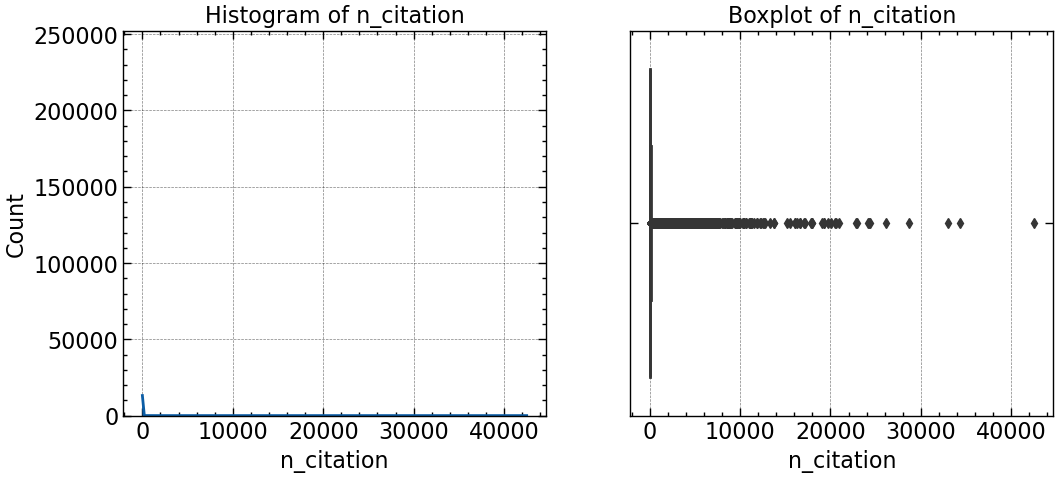

Summary Statistics for year:
count    827532.000000
mean       2009.124222
std           6.943853
min        1951.000000
25%        2006.000000
50%        2010.000000
75%        2015.000000
max        2017.000000
Name: year, dtype: float64


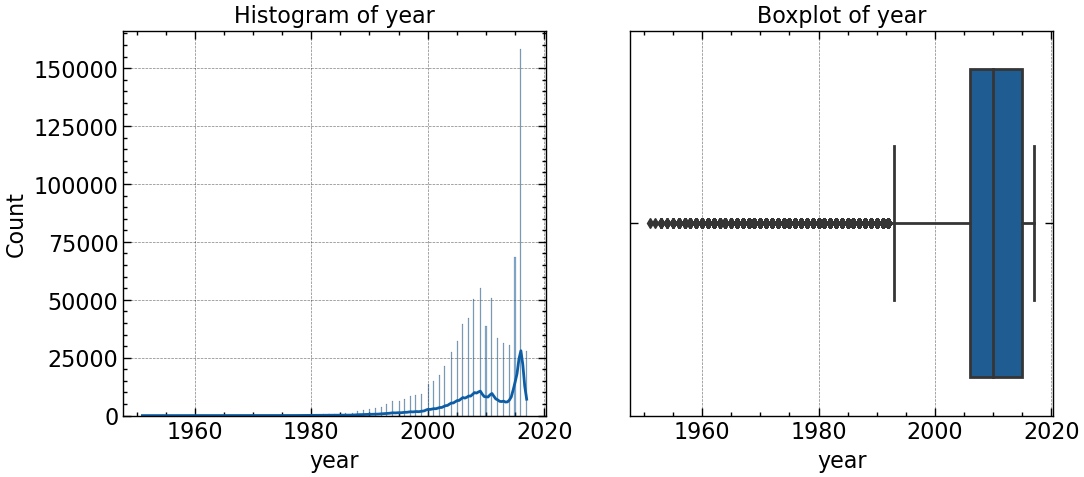

In [31]:
for col in ['n_citation', 'year'] :
    univariate_analysis(df, col)

In [34]:
df['venue_numeric'], venue_mapping = pd.factorize(df['venue'])

venue_mapping = dict(enumerate(venue_mapping))
print("Numeric to Venue Mapping:")
print(venue_mapping)


Numeric to Venue Mapping:
{0: 'international symposium on computers and communications', 1: 'Neurocomputing', 2: 'Electronic Journal of Combinatorics', 3: 'international conference on computer vision', 4: 'Ima Journal of Mathematical Control and Information', 5: 'International Journal of Computer Aided Engineering and Technology', 6: 'IEEE Journal of Solid-state Circuits', 7: 'algorithmic learning theory', 8: 'international conference on robotics and automation', 9: 'Discrete Mathematics', 10: 'international conference on management of data', 11: 'programming language design and implementation', 12: 'international symposium on circuits and systems', 13: 'ACM Communications in Computer Algebra', 14: 'international conference on data engineering', 15: 'winter simulation conference', 16: 'bioinformatics research and development', 17: 'Computers & Chemical Engineering', 18: 'international conference on semantic computing', 19: 'Information Systems Research', 20: 'international conference o

In [ ]:
df['venue_numeric'], venue_mapping = pd.factorize(df['venue'])

venue_mapping = dict(enumerate(venue_mapping))
print("Numeric to Venue Mapping:")
print(venue_mapping)


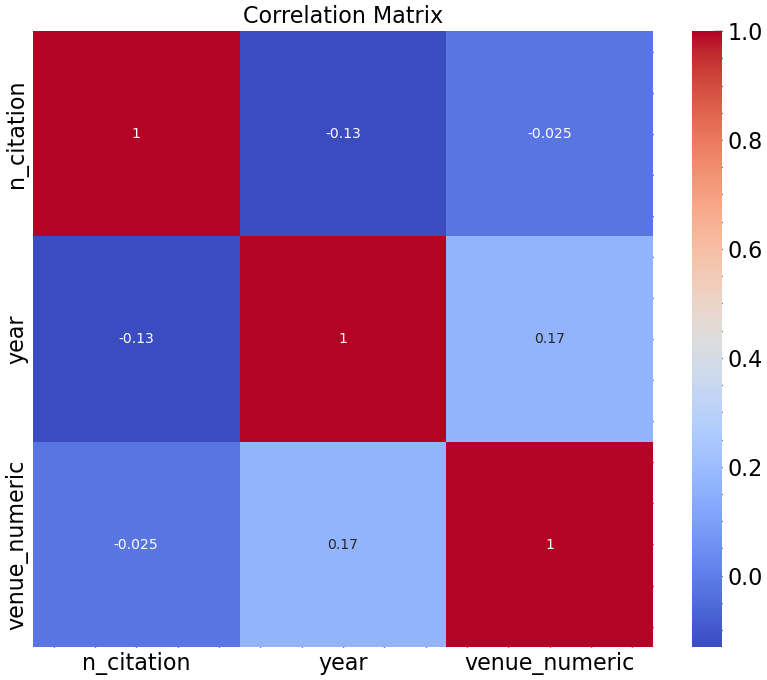

In [35]:
plot_correlation_matrix(df)

In [36]:
df.columns

Index(['abstract', 'authors', 'n_citation', 'references', 'title', 'venue',
       'year', 'id', 'venue_numeric'],
      dtype='object')

# 3. NLP Pre-processing 

In [27]:
df['venue'].value_counts()

international conference on acoustics, speech, and signal processing    11770
international conference on robotics and automation                      9573
Lecture Notes in Computer Science                                        7606
international conference on communications                               7272
intelligent robots and systems                                           6968
                                                                        ...  
International Journal of Architectural Computing                            1
international conference on wireless and ubiquitous systems                 1
International Journal of Advanced Networking and Applications               1
Info                                                                        1
Progress in Biophysics & Molecular Biology                                  1
Name: venue, Length: 3779, dtype: int64